In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import baseflow
import baseflow.separation

import baseflow.utils

In [36]:
def plot_baseflow_separation(Q, baseflows, method_names=None, interactive=False):
    if method_names is None:
        method_names = list(baseflows.keys())

    if interactive:
        fig = make_subplots()
        fig.add_trace(go.Scatter(x=Q.index, y=Q.values, name='Streamflow', line=dict(width=2)))

        for method in method_names:
            if method in baseflows:
                fig.add_trace(go.Scatter(x=Q.index, y=baseflows[method], name=f'{method} Baseflow'))

        fig.update_layout(
            title='Baseflow Separation',
            xaxis_title='Date',
            yaxis_title='Flow',
            legend_title='Methods',
            hovermode="x unified",
            width=1100,
            height=600
        )

        return fig
    else:
        plt.figure(figsize=(12, 6))
        plt.plot(Q.index, Q.values, label='Observed Streamflow', alpha=0.7)

        for method in method_names:
            if method in baseflows:
                plt.plot(Q.index, baseflows[method], label=f'{method} Baseflow', alpha=0.7)

        plt.xlabel('Date')
        plt.ylabel('Flow')
        plt.title('Baseflow Separation')
        plt.legend()
        plt.grid(True)

        return plt.gcf()

In [37]:
# Read WOD data
df_410734 = pd.read_csv('Data/LBG/410734.csv', index_col=0)

In [38]:
df_410734
df_410734.index = pd.to_datetime(df_410734.index, format='mixed', dayfirst=True, errors='coerce')
df_410734 = df_410734[~df_410734.index.isna()]
df_410734

,Flow (Ml/d)
Date,
1966-08-04,55.9008
1966-08-05,53.3088
1966-08-06,49.4208
1966-08-07,47.2608
1966-08-08,47.1744
...,...
2024-12-27,13.4784
2024-12-28,13.8240
2024-12-29,13.1328


In [39]:
Q_410734 = df_410734[df_410734.columns[0]]
Q_410734

Date
1966-08-04      55.9008
1966-08-05      53.3088
1966-08-06      49.4208
1966-08-07      47.2608
1966-08-08      47.1744
                ...    
2024-12-27      13.4784
2024-12-28      13.8240
2024-12-29      13.1328
2024-12-30      11.5776
2024-12-31   -9999.0000
Name: Flow (Ml/d), Length: 21335, dtype: float64

In [40]:
BF_410734 = baseflow.single(Q_410734)

In [41]:
BF_410734

(                  UKIH       Local    Fixed    Slide          LH    Chapman  \
 Date                                                                          
 1966-08-04   47.748216   47.748216  46.6560  47.2608   47.748216  47.748216   
 1966-08-05   47.192277   47.192277  46.6560  47.2608   47.192277  47.046505   
 1966-08-06   46.853964   46.853964  46.6560  47.2608   46.853964  46.313278   
 1966-08-07   46.733410   46.733410  46.6560  47.2608   46.733410  45.553323   
 1966-08-08   46.694151   46.694151  46.6560  46.6560   46.694151  44.800176   
 ...                ...         ...      ...      ...         ...        ...   
 2024-12-27   11.890876   11.890876  11.5776  11.5776   11.890876  13.478400   
 2024-12-28   11.761632   11.761632  11.5776  11.5776   11.761632  13.250072   
 2024-12-29   11.635920   11.635920  11.5776  11.5776   11.635920  13.026616   
 2024-12-30   11.577600   11.577600  11.5776  11.5776   11.577600  11.577600   
 2024-12-31  386.105940  386.105940  11.

In [42]:
import plotly.graph_objects as go

def plot_410734_ukih(save_as_html=False, html_filename='410734_ukih_plot.html'):
    # Plot WOD
    flow_410734 = Q_410734
    ukih_410734 = BF_410734[0]['UKIH']

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=flow_410734.index,
        y=flow_410734.values,
        mode='lines',
        name='410734 Flow',
        line=dict(color='black')
    ))

    fig.add_trace(go.Scatter(
        x=ukih_410734.index,
        y=ukih_410734.values,
        mode='lines',
        name='410734 UKIH Baseflow',
        line=dict(color='royalblue')
    ))

    fig.update_layout(
        title='410734 Empirical Flow vs UKIH Baseflow',
        xaxis_title='Date',
        yaxis_title='Flow',
        legend=dict(x=0, y=1),
        height=800,
    )

    if save_as_html:
        fig.write_html(html_filename)
        print(f"Plot saved as HTML: {html_filename}")
    else:
        fig.show()

# Usage: show in notebook
# plot_410734_ukih(save_as_html=False)

# To save as HTML:
plot_410734_ukih(save_as_html=True, html_filename='410734_ukih_plot.html')

Plot saved as HTML: 410734_ukih_plot.html


In [43]:
flow_410734 = Q_410734
ukih_410734 = BF_410734[0]['UKIH']

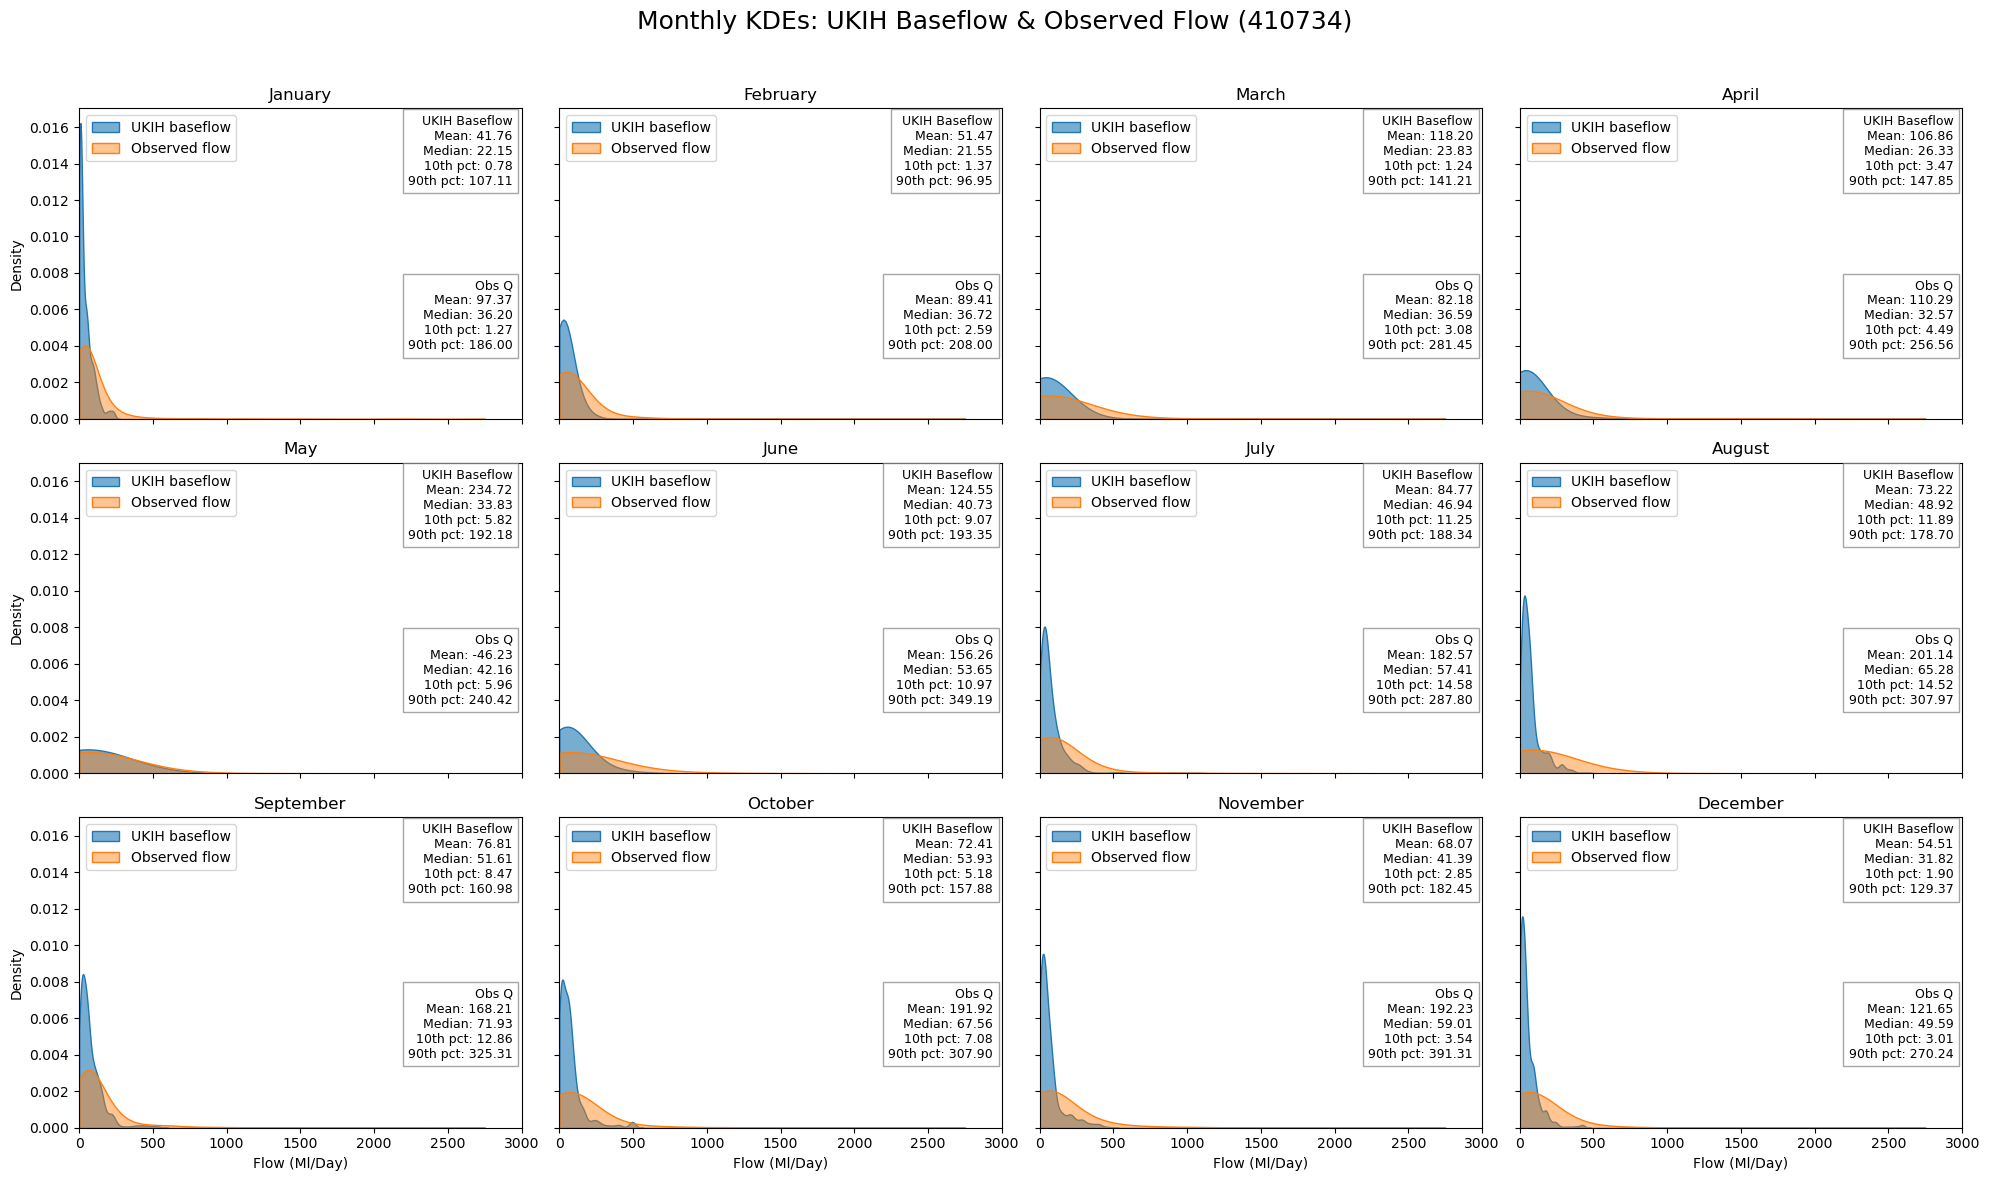

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Prepare the data for both baseflow and observed flow
df_ukih = ukih_410734.dropna().copy()
df_ukih = df_ukih.reset_index()
# Instead of referencing 'Datetime' (which may not be present), use the index column from reset_index()
# The first column after reset_index() will be the former index. Let's check its name:
# Usually it will be named according to the index name (e.g. 'Date'), or just 'index' if unnamed.
ukih_index_col = df_ukih.columns[0]  # dynamically identify the index column

# Add months using the proper index column
df_ukih['Month'] = pd.to_datetime(df_ukih[ukih_index_col]).dt.month_name()
df_ukih['Month_Num'] = pd.to_datetime(df_ukih[ukih_index_col]).dt.month

# Prepare observed flow (Q)
df_q = Q_410734.dropna().copy()
df_q = df_q.reset_index()
df_q = df_q.rename(columns={Q_410734.name: 'Q'})
q_index_col = df_q.columns[0]  # get the old index column name
df_q['Month'] = pd.to_datetime(df_q[q_index_col]).dt.month_name()
df_q['Month_Num'] = pd.to_datetime(df_q[q_index_col]).dt.month

# Sort months to keep order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Find reasonable x-axis limits based on percentiles (e.g., 1st, 99th percentiles of all observed & baseflow data)
all_flows = pd.concat([df_ukih['UKIH'], df_q['Q']])
x_min = np.percentile(all_flows, 0.5)
x_max = np.percentile(all_flows, 99.5)

# Create subplots, one for each month
fig, axes = plt.subplots(3, 4, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

# We'll manually collect the xticks and xticklabels from a reference axis (first subplot with data)
reference_xticks, reference_xticklabels = None, None

for idx, month in enumerate(month_order):
    ax = axes[idx]
    month_data_ukih = df_ukih[df_ukih['Month'] == month]
    month_data_q = df_q[df_q['Month'] == month]
    has_data = False
    if not month_data_ukih.empty:
        sns.kdeplot(
            data=month_data_ukih,
            x='UKIH',
            fill=True,
            common_norm=False,
            alpha=0.6,
            ax=ax,
            color='C0',
            label='UKIH baseflow',
            clip=(x_min, x_max)
        )
        # Compute stats for baseflow
        mean_val = month_data_ukih['UKIH'].mean()
        median_val = month_data_ukih['UKIH'].median()
        pct10 = np.percentile(month_data_ukih['UKIH'], 10)
        pct90 = np.percentile(month_data_ukih['UKIH'], 90)
        stats_txt = (
            f"UKIH Baseflow\n"
            f"Mean: {mean_val:.2f}\n"
            f"Median: {median_val:.2f}\n"
            f"10th pct: {pct10:.2f}\n"
            f"90th pct: {pct90:.2f}"
        )
        # Display textbox in top right
        ax.text(
            0.98, 0.98, stats_txt,
            transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
        )
        has_data = True
    if not month_data_q.empty:
        sns.kdeplot(
            data=month_data_q,
            x='Q',
            fill=True,
            common_norm=False,
            alpha=0.45,
            ax=ax,
            color='C1',
            label='Observed flow',
            clip=(x_min, x_max)
        )
        # Compute stats for observed flow
        mean_q = month_data_q['Q'].mean()
        median_q = month_data_q['Q'].median()
        pct10_q = np.percentile(month_data_q['Q'], 10)
        pct90_q = np.percentile(month_data_q['Q'], 90)
        stats_txt_q = (
            f"Obs Q\n"
            f"Mean: {mean_q:.2f}\n"
            f"Median: {median_q:.2f}\n"
            f"10th pct: {pct10_q:.2f}\n"
            f"90th pct: {pct90_q:.2f}"
        )
        # Display second stats textbox, bottom right
        ax.text(
            0.98, 0.45, stats_txt_q,
            transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
        )
        has_data = True
    ax.set_title(month)
    ax.set_xlabel('Flow (Ml/Day)')
    ax.set_ylabel('Density')
    ax.set_xlim(x_min, x_max)
    if has_data:
        ax.legend()
    # For the first axis with data, save the xticks and labels for reuse
    if reference_xticks is None and has_data:
        reference_xticks = ax.get_xticks()
        reference_xticklabels = [item.get_text() for item in ax.get_xticklabels()]

# Ensure all subplots show x axis tick labels, not just the bottom row
for ax in axes:
    if reference_xticks is not None:
        ax.set_xticks(reference_xticks)
        if reference_xticklabels and all(lbl != '' for lbl in reference_xticklabels):
            ax.set_xticklabels(reference_xticklabels, rotation=0)

plt.suptitle('Monthly KDEs: UKIH Baseflow & Observed Flow (410734)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

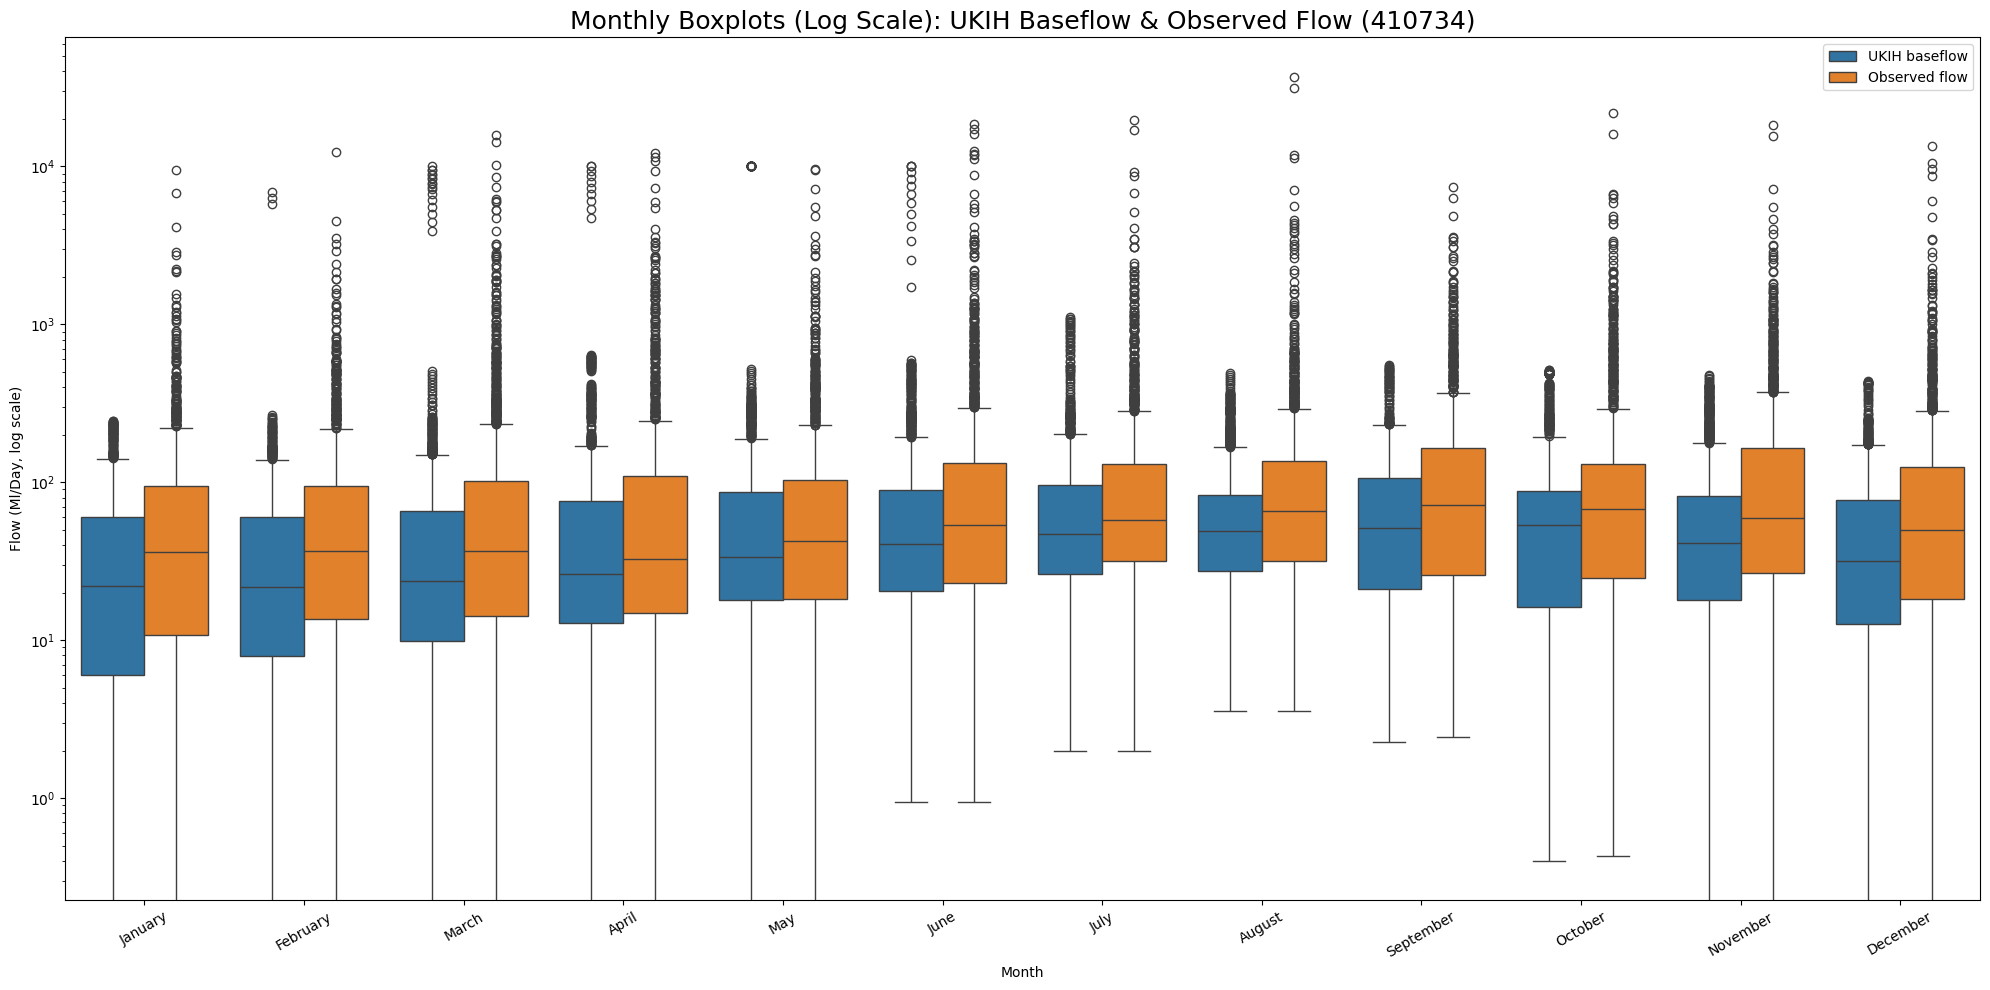

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Prepare the data for both baseflow and observed flow
df_ukih = ukih_410734.dropna().copy()
df_ukih = df_ukih.reset_index()
# Use the first column after reset_index (assumed to be the datetime index) if 'Datetime' is not present
datetime_col_ukih = df_ukih.columns[0]
df_ukih['Month'] = pd.to_datetime(df_ukih[datetime_col_ukih]).dt.month_name()
df_ukih['Month_Num'] = pd.to_datetime(df_ukih[datetime_col_ukih]).dt.month

df_q = Q_410734.dropna().copy()
df_q = df_q.reset_index()
df_q = df_q.rename(columns={Q_410734.name: 'Q'})
# Use the first column after reset_index (assumed to be the datetime index) if 'Datetime' is not present
datetime_col_q = df_q.columns[0]
df_q['Month'] = pd.to_datetime(df_q[datetime_col_q]).dt.month_name()
df_q['Month_Num'] = pd.to_datetime(df_q[datetime_col_q]).dt.month

# Prepare for consistent month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Merge the two datasets for plotting
df_ukih_plot = df_ukih[['Month', 'Month_Num', 'UKIH']].copy()
df_ukih_plot['Type'] = 'UKIH baseflow'
df_ukih_plot = df_ukih_plot.rename(columns={'UKIH': 'Flow'})

df_q_plot = df_q[['Month', 'Month_Num', 'Q']].copy()
df_q_plot['Type'] = 'Observed flow'
df_q_plot = df_q_plot.rename(columns={'Q': 'Flow'})

df_plot = pd.concat([df_ukih_plot, df_q_plot], ignore_index=True)

# Set categorical order for months
df_plot['Month'] = pd.Categorical(df_plot['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(20, 10))
ax = sns.boxplot(
    data=df_plot,
    x='Month',
    y='Flow',
    hue='Type',
    order=month_order,
    palette=['C0', 'C1']
)

ax.set_yscale('log')
plt.title('Monthly Boxplots (Log Scale): UKIH Baseflow & Observed Flow (410734)', fontsize=18)
plt.xlabel('Month')
plt.ylabel('Flow (Ml/Day, log scale)')
plt.legend(title='')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [46]:
flow_410734

Date
1966-08-04      55.9008
1966-08-05      53.3088
1966-08-06      49.4208
1966-08-07      47.2608
1966-08-08      47.1744
                ...    
2024-12-27      13.4784
2024-12-28      13.8240
2024-12-29      13.1328
2024-12-30      11.5776
2024-12-31   -9999.0000
Name: Flow (Ml/d), Length: 21335, dtype: float64

In [47]:
ukih_410734

Date
1966-08-04     47.748216
1966-08-05     47.192277
1966-08-06     46.853964
1966-08-07     46.733410
1966-08-08     46.694151
                 ...    
2024-12-27     11.890876
2024-12-28     11.761632
2024-12-29     11.635920
2024-12-30     11.577600
2024-12-31    386.105940
Name: UKIH, Length: 21335, dtype: float64

In [48]:
# Ensure the observed flow column is correctly named
# If flow_410734 is a Series, use its name attribute
if isinstance(flow_410734, pd.Series):
    obs_flow_col = flow_410734.name
    flow_df = flow_410734.to_frame()
else:
    obs_flow_col = flow_410734.columns[0]
    flow_df = flow_410734

merged_410734 = pd.concat([flow_df, ukih_410734], axis=1)
merged_410734['UKIH_Proportion'] = merged_410734['UKIH'] / merged_410734[obs_flow_col]
merged_410734

,Flow (Ml/d),UKIH,UKIH_Proportion
Date,,,
1966-08-04,55.9008,47.748216,0.854160
1966-08-05,53.3088,47.192277,0.885262
1966-08-06,49.4208,46.853964,0.948062
1966-08-07,47.2608,46.733410,0.988841
1966-08-08,47.1744,46.694151,0.989820
...,...,...,...
2024-12-27,13.4784,11.890876,0.882217
2024-12-28,13.8240,11.761632,0.850813
2024-12-29,13.1328,11.635920,0.886020


/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/3322865972.py:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



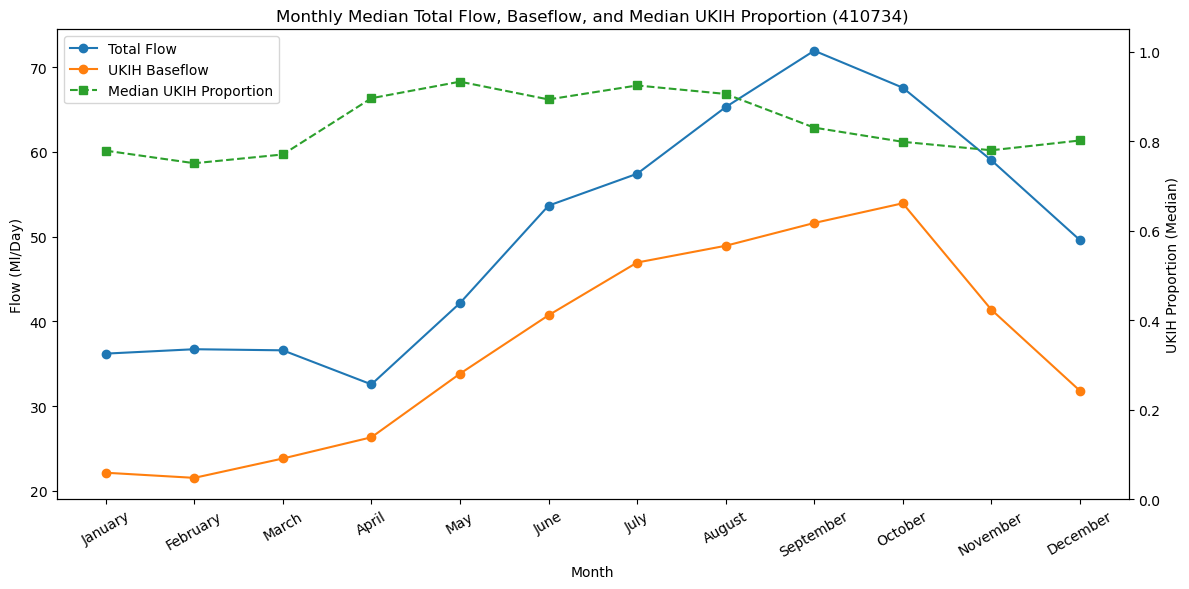

In [49]:
# Fix: Use the actual observed flow column name (from earlier logic, obs_flow_col), not a hardcoded column name.
import calendar

# Calculate monthly medians for total flow and baseflow
monthly_medians = merged_410734.groupby(merged_410734.index.strftime('%B'))[
    [obs_flow_col, 'UKIH']
].median()

# Ensure order of months is calendar order
month_order = list(calendar.month_name)[1:]  # calendar.month_name[0] is empty string
monthly_medians = monthly_medians.reindex(month_order)

# Calculate median UKIH proportion for each month (calendar order)
monthly_median_prop = merged_410734.groupby(merged_410734.index.strftime('%B'))['UKIH_Proportion'].median()
monthly_median_prop = monthly_median_prop.reindex(month_order)

fig, ax1 = plt.subplots(figsize=(12, 6))

lns1 = ax1.plot(monthly_medians.index, monthly_medians[obs_flow_col], marker='o', label='Total Flow', color='C0')
lns2 = ax1.plot(monthly_medians.index, monthly_medians['UKIH'], marker='o', label='UKIH Baseflow', color='C1')
ax1.set_xlabel('Month')
ax1.set_ylabel('Flow (Ml/Day)')
ax1.set_xticklabels(monthly_medians.index, rotation=30)
ax1.tick_params(axis='y')
ax1.set_title('Monthly Median Total Flow, Baseflow, and Median UKIH Proportion (410734)')

ax2 = ax1.twinx()
lns3 = ax2.plot(monthly_median_prop.index, monthly_median_prop.values, marker='s', linestyle='--', color='C2', label='Median UKIH Proportion')
ax2.set_ylabel('UKIH Proportion (Median)')
ax2.set_ylim(0, 1.05)
ax2.tick_params(axis='y')

# Combine legends
lns = lns1 + lns2 + lns3
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')

plt.tight_layout()
plt.show()

In [50]:
def plot_monthly_medians_suite(csv_files, date_col='Date', flow_col=None,
                              ukih_col_name='UKIH', figsize=(12,6)):
    """
    For each CSV file in csv_files, computes UKIH baseflow separation
    using the baseflow.single method and produces a
    monthly median plot of Total Flow, UKIH Baseflow, and Proportion as in cell 14.

    Args:
        csv_files: list of file paths (str) to CSVs, each with a date column and a discharge column.
        date_col: name of the datetime column in the input files.
        flow_col: unused; always uses the second column from CSV as flow.
        ukih_col_name: name for new baseflow column in dataframe.
        figsize: tuple, for each plot

    Returns: None (shows plots)
    """
    import pandas as pd
    import calendar
    import matplotlib.pyplot as plt
    import baseflow

    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        # Second column is always assumed to be the flow/discharge column
        all_cols = df.columns.tolist()
        # Find flow column programmatically as the second column (first is date)
        if len(all_cols) < 2:
            raise ValueError(f"File {csv_file} does not have at least two columns")
        flow_col_name_actual = all_cols[1]
        # Strip whitespace from date column and parse datetime (dayfirst for DD/MM/YYYY format)
        df[date_col] = df[date_col].astype(str).str.strip()
        df[date_col] = pd.to_datetime(df[date_col], dayfirst=True)
        df = df.set_index(date_col)
        df = df.sort_index()

        Q = df[flow_col_name_actual].copy()
        # Compute UKIH baseflow using the baseflow package
        BF_result = baseflow.single(Q)
        BF_df = BF_result[0]  # Extract the DataFrame from the tuple
        df[ukih_col_name] = BF_df['UKIH']

        # Compute UKIH baseflow proportion
        df[f'{ukih_col_name}_Proportion'] = df[ukih_col_name] / df[flow_col_name_actual]

        # Calendar month name order
        month_order = list(calendar.month_name)[1:]  # Jan...Dec

        monthly_medians = df.groupby(df.index.strftime('%B'))[
            [flow_col_name_actual, ukih_col_name]
        ].median()
        monthly_medians = monthly_medians.reindex(month_order)

        monthly_median_prop = df.groupby(df.index.strftime('%B'))[f'{ukih_col_name}_Proportion'].median()
        monthly_median_prop = monthly_median_prop.reindex(month_order)

        fig, ax1 = plt.subplots(figsize=figsize)
        lns1 = ax1.plot(monthly_medians.index, monthly_medians[flow_col_name_actual], marker='o', label='Total Flow', color='C0')
        lns2 = ax1.plot(monthly_medians.index, monthly_medians[ukih_col_name], marker='o', label='UKIH Baseflow', color='C1')
        ax1.set_xlabel('Month')
        ax1.set_ylabel('Flow (Ml/Day)')
        ax1.set_xticklabels(monthly_medians.index, rotation=30)
        ax1.tick_params(axis='y')
        ax1.set_title(f'Monthly Median Total Flow, Baseflow, and Median UKIH Proportion\n({csv_file})')
        ax2 = ax1.twinx()
        lns3 = ax2.plot(monthly_median_prop.index, monthly_median_prop.values, marker='s', linestyle='--', color='C2', label='Median UKIH Proportion')
        ax2.set_ylabel('UKIH Proportion (Median)')
        ax2.set_ylim(0, 1.05)
        ax2.tick_params(axis='y')
        # Combine legends
        lns = lns1 + lns2 + lns3
        labels = [l.get_label() for l in lns]
        ax1.legend(lns, labels, loc='upper left')
        plt.tight_layout()
        plt.show()

In [51]:
def plot_monthly_proportions_all_methods(csv_files, date_col='Date', figsize=(14, 8)):
    """
    For each CSV file, computes baseflow separation using ALL methods
    and plots monthly median proportions (baseflow/total flow) for each method.
    
    This creates a focused view of just the proportion lines across all methods,
    making it easier to compare how different separation algorithms estimate
    the baseflow contribution throughout the year.

    Args:
        csv_files: list of file paths (str) to CSVs, each with a date column and a discharge column.
        date_col: name of the datetime column in the input files.
        figsize: tuple, figure size for each plot

    Returns: None (shows plots)
    """
    import pandas as pd
    import calendar
    import matplotlib.pyplot as plt
    import numpy as np
    import os
    import baseflow

    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        # Second column is always assumed to be the flow/discharge column
        all_cols = df.columns.tolist()
        if len(all_cols) < 2:
            raise ValueError(f"File {csv_file} does not have at least two columns")
        flow_col_name = all_cols[1]
        
        # Strip whitespace from date column and parse datetime
        df[date_col] = df[date_col].astype(str).str.strip()
        df[date_col] = pd.to_datetime(df[date_col], dayfirst=True)
        df = df.set_index(date_col)
        df = df.sort_index()

        Q = df[flow_col_name].copy()
        
        # Compute baseflow for all methods
        BF_result = baseflow.single(Q)
        BF_df = BF_result[0]  # Extract the DataFrame from the tuple
        all_methods = list(BF_df.columns)
        
        # Add all baseflow methods to dataframe and compute proportions
        for method in all_methods:
            df[method] = BF_df[method]
            df[f'{method}_Proportion'] = df[method] / df[flow_col_name]

        # Calendar month name order
        month_order = list(calendar.month_name)[1:]  # Jan...Dec

        # Calculate median proportions for all methods
        monthly_median_props = {}
        for method in all_methods:
            monthly_median_props[method] = df.groupby(df.index.strftime('%B'))[f'{method}_Proportion'].median().reindex(month_order)

        # Create plot
        fig, ax = plt.subplots(figsize=figsize)
        
        # Define colors, linestyles, and markers for each method
        colors = plt.cm.tab20(np.linspace(0, 1, len(all_methods)))
        linestyles = ['-', '--', '-.', ':'] * (len(all_methods) // 4 + 1)
        markers = ['o', 's', '^', 'v', 'D', '*', 'p', 'h', '<', '>', 'X', 'P'] * (len(all_methods) // 12 + 1)
        
        # Plot proportion lines for all methods
        for idx, method in enumerate(all_methods):
            ax.plot(monthly_median_props[method].index, monthly_median_props[method].values, 
                   marker=markers[idx], linestyle=linestyles[idx], color=colors[idx], 
                   label=f'{method}', linewidth=2, markersize=7, alpha=0.85)
        
        # Extract gauge ID from filename for title
        gauge_id = os.path.basename(csv_file).replace('.csv', '')
        
        ax.set_xlabel('Month', fontsize=12)
        ax.set_ylabel('Baseflow Proportion (Median)', fontsize=12)
        ax.set_title(f'Monthly Median Baseflow Proportions - All Methods ({gauge_id})', fontsize=14)
        ax.set_ylim(0, 1.05)
        ax.set_xticklabels(month_order, rotation=30, ha='right')
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10, title='Method')
        
        plt.tight_layout()
        plt.show()
        
        # Also print a summary table of median proportions by method
        print(f"\n--- Summary: Median Annual Baseflow Proportion ({gauge_id}) ---")
        annual_medians = {method: df[f'{method}_Proportion'].median() for method in all_methods}
        for method, median_val in sorted(annual_medians.items(), key=lambda x: x[1], reverse=True):
            print(f"  {method:12s}: {median_val:.3f}")
        print()

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/2640702482.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



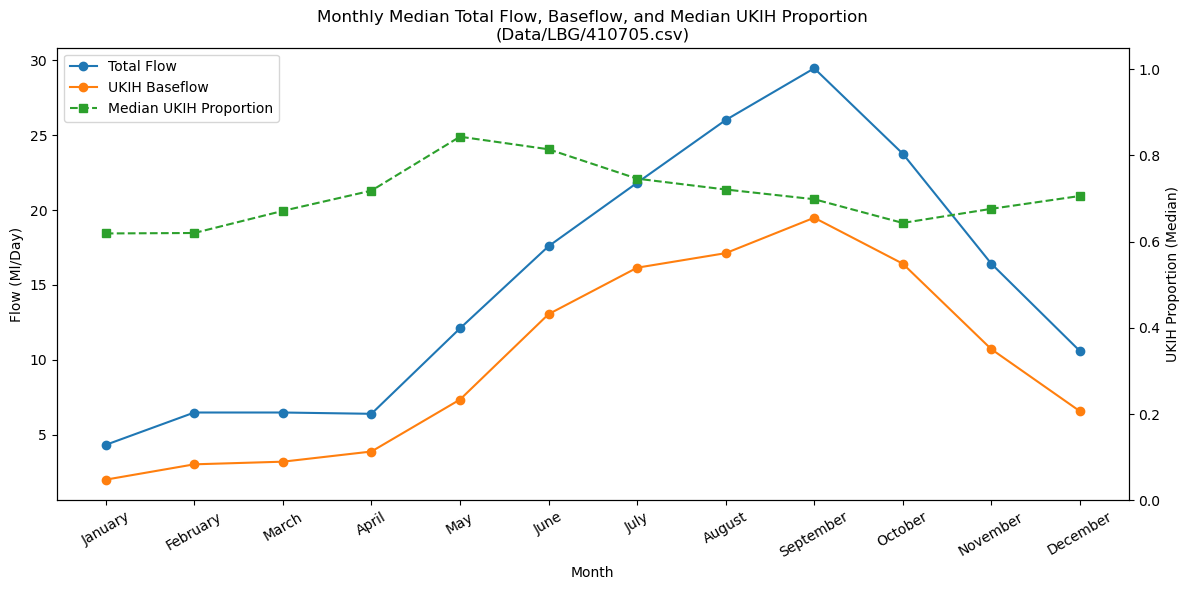

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/2640702482.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



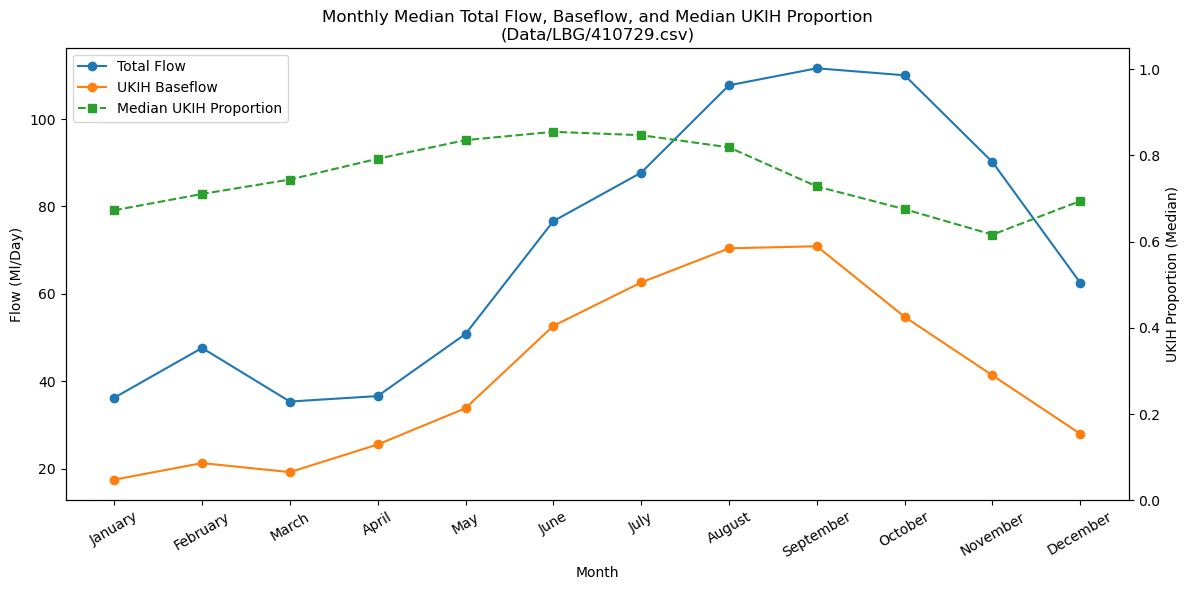

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/2640702482.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



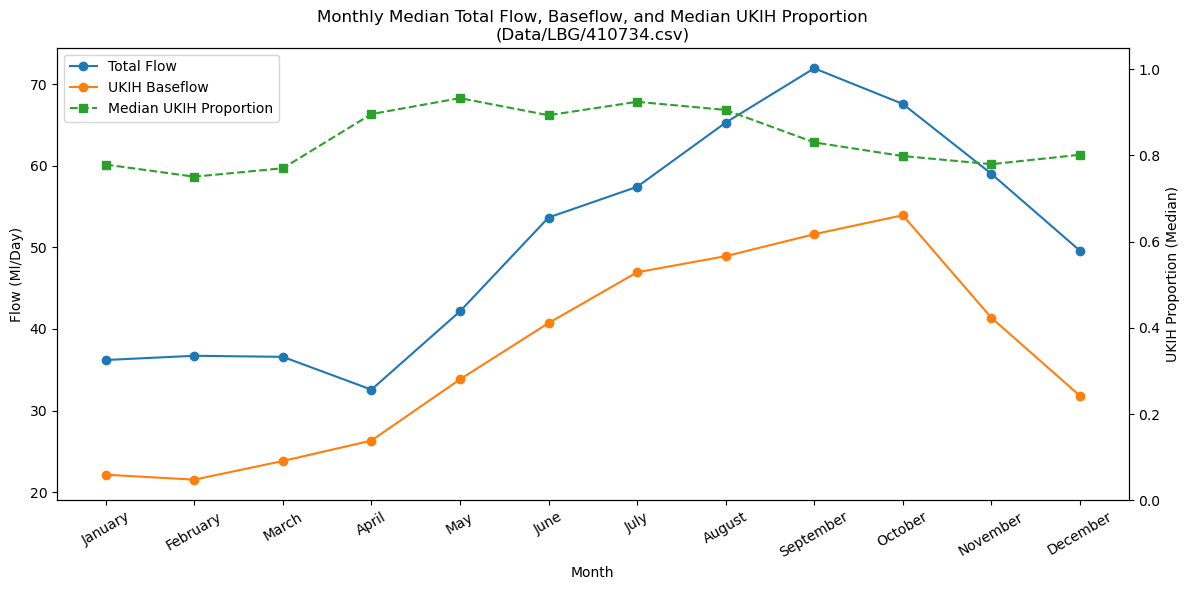

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/2640702482.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



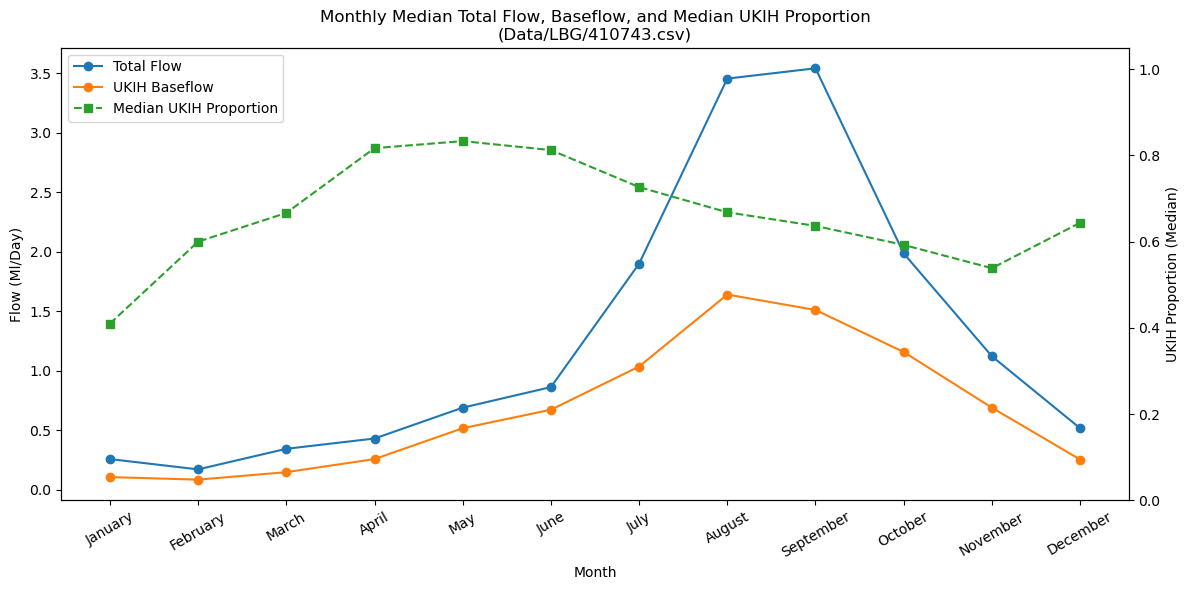

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/2640702482.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



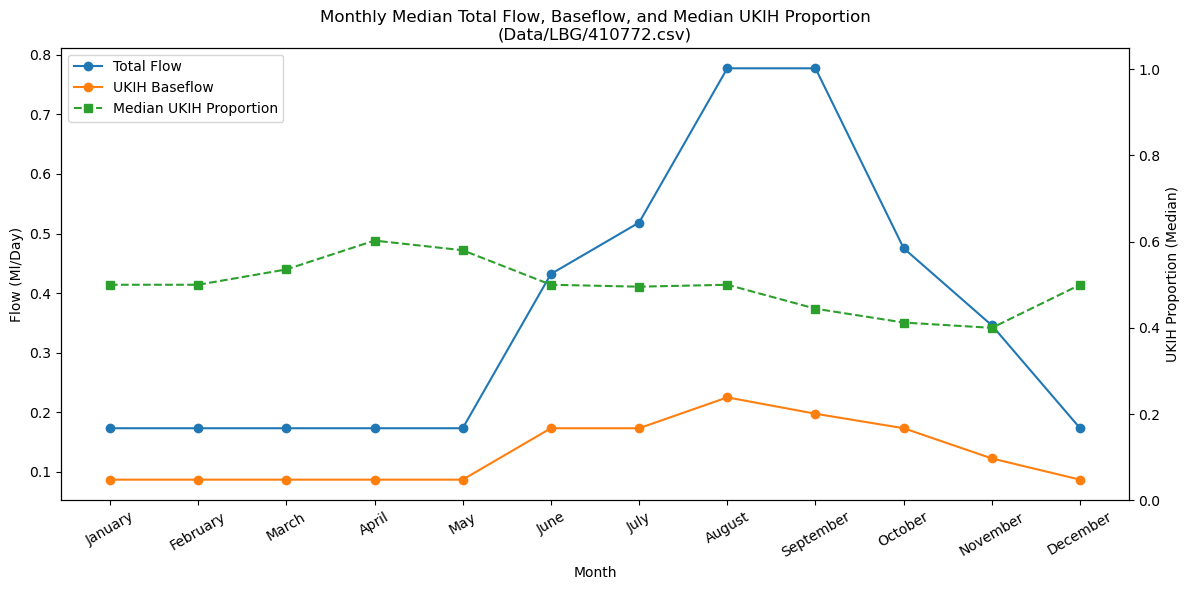

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/2640702482.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



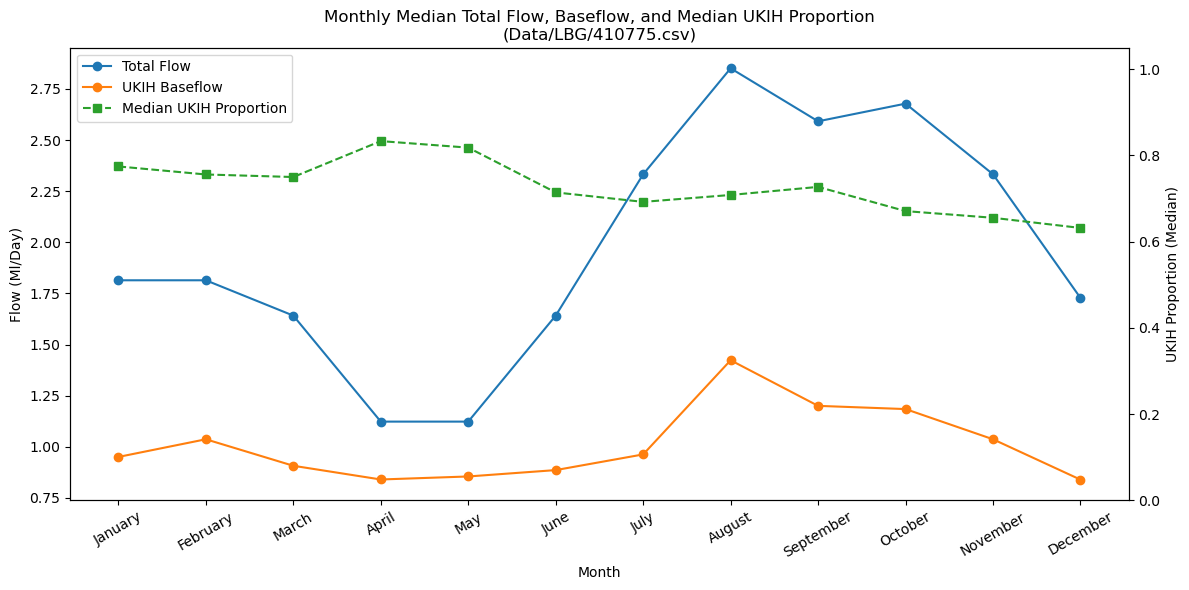

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/2640702482.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



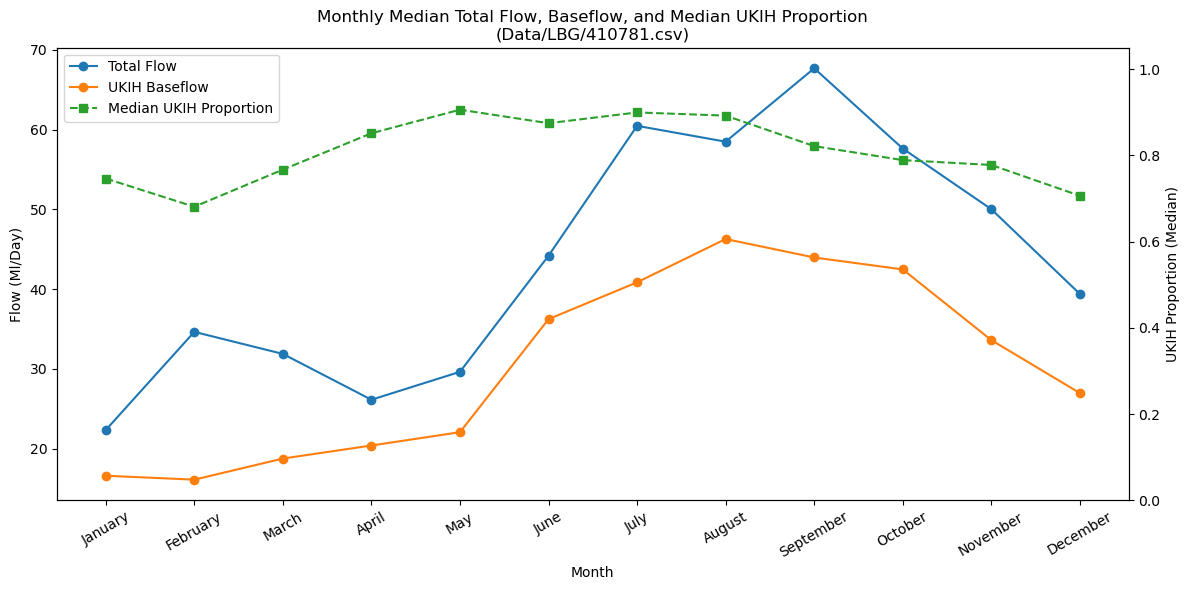

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/2640702482.py:61: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



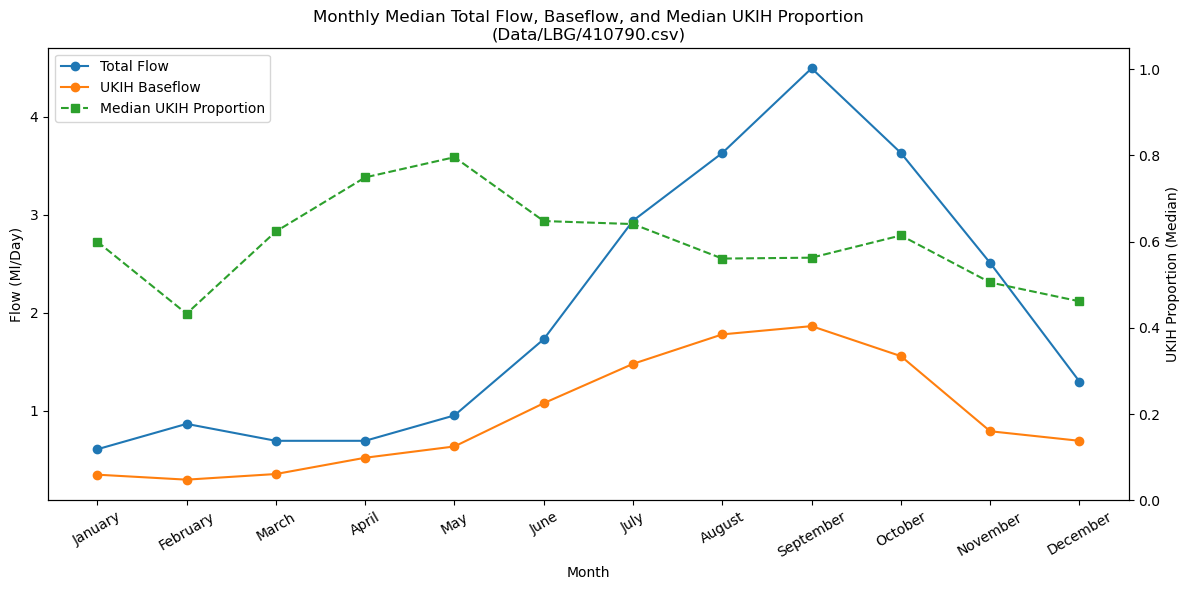

In [52]:
import os

data_dir = "Data/LBG/"
csv_files = [
    os.path.join(data_dir, fname)
    for fname in os.listdir(data_dir)
    if fname.lower().endswith(".csv")
]

for csv_path in sorted(csv_files):
    plot_monthly_medians_suite(
        [csv_path],  # Wrapped in a list since function expects a list of files
        flow_col='Flow (ML/d)',
        date_col='Date',
        ukih_col_name='UKIH',
        figsize=(12,6)
    )

/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/4245979009.py:79: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



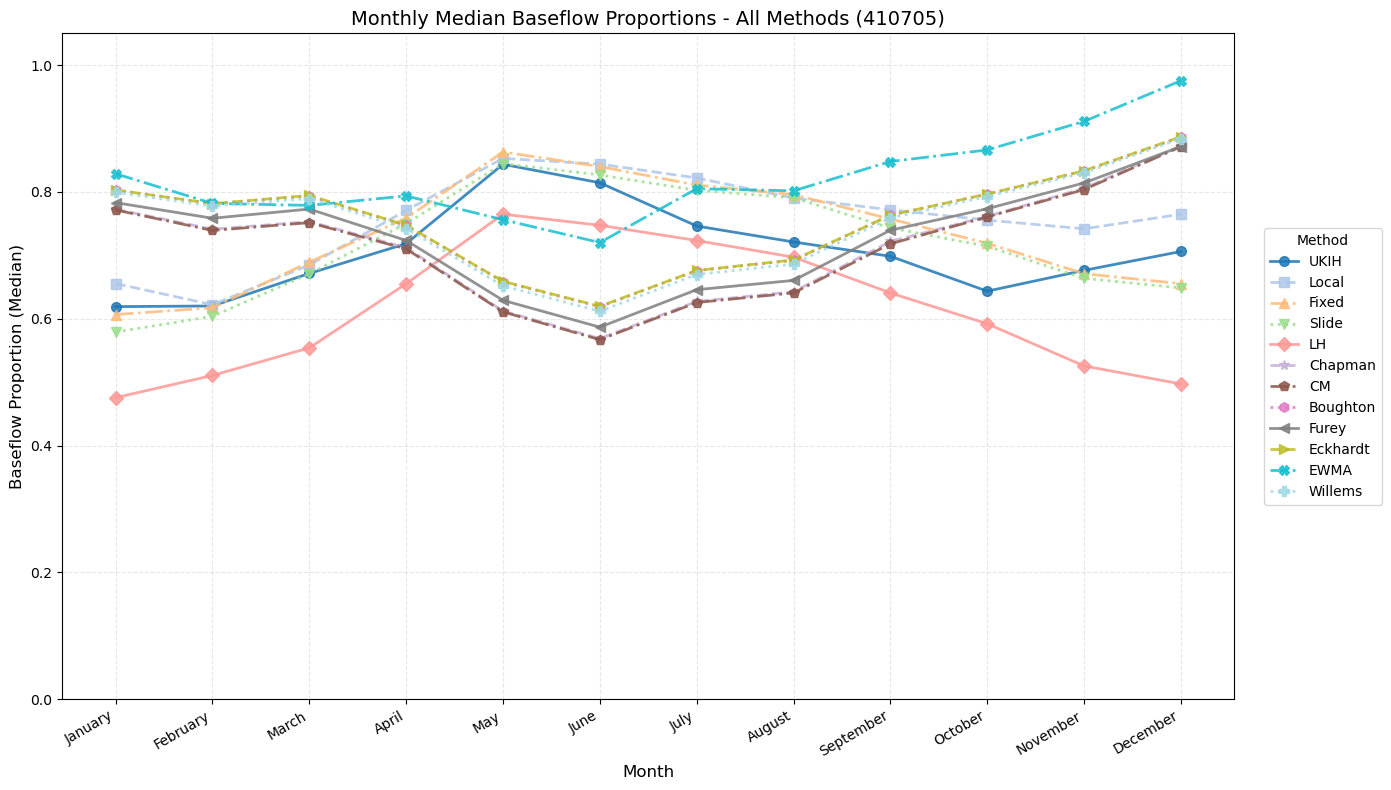


--- Summary: Median Annual Baseflow Proportion (410705) ---
  EWMA        : 0.812
  Local       : 0.770
  Fixed       : 0.748
  Eckhardt    : 0.736
  Boughton    : 0.735
  Slide       : 0.731
  Willems     : 0.730
  UKIH        : 0.714
  Furey       : 0.708
  Chapman     : 0.691
  CM          : 0.689
  LH          : 0.622



/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/4245979009.py:79: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



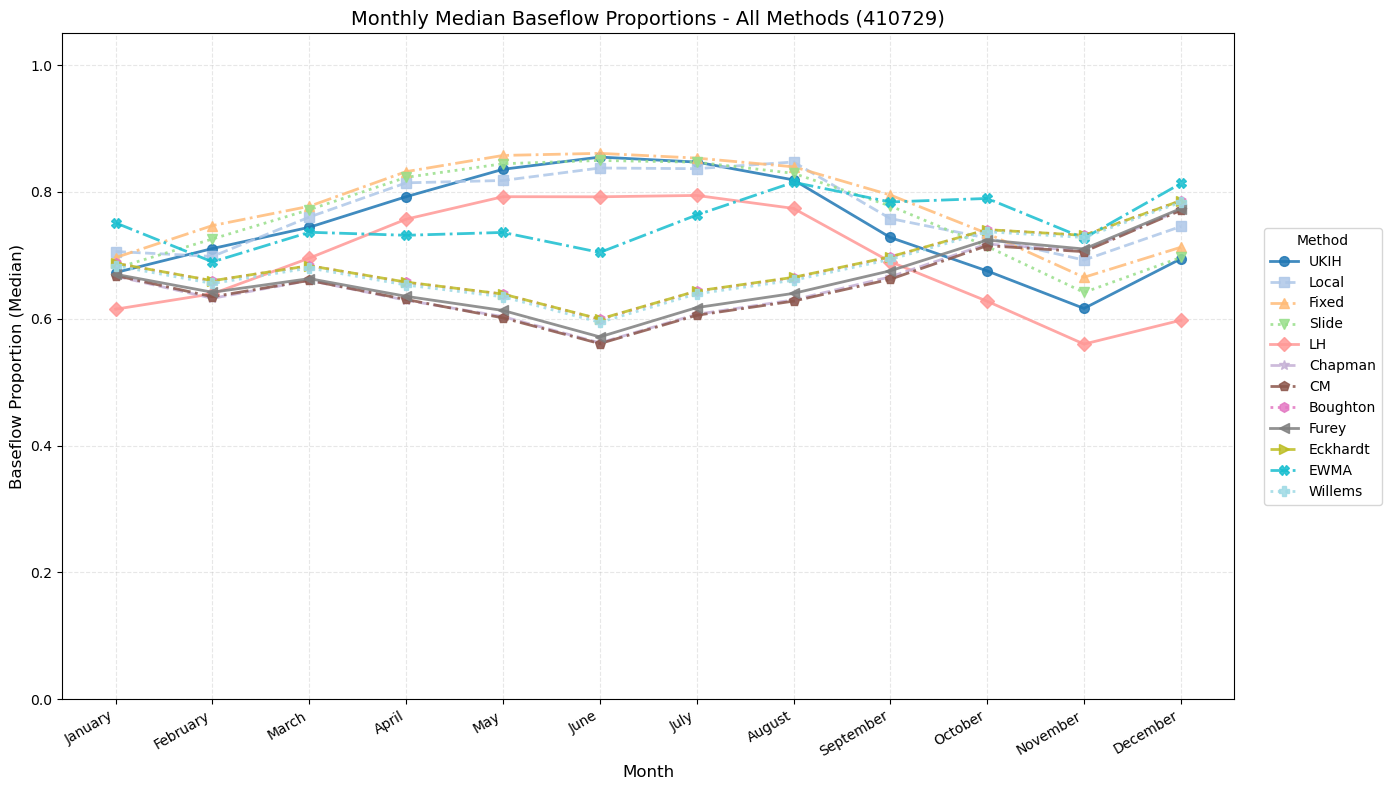


--- Summary: Median Annual Baseflow Proportion (410729) ---
  Fixed       : 0.790
  Local       : 0.777
  Slide       : 0.777
  UKIH        : 0.759
  EWMA        : 0.754
  LH          : 0.703
  Eckhardt    : 0.671
  Boughton    : 0.671
  Willems     : 0.667
  Furey       : 0.650
  Chapman     : 0.642
  CM          : 0.641



/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/4245979009.py:79: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



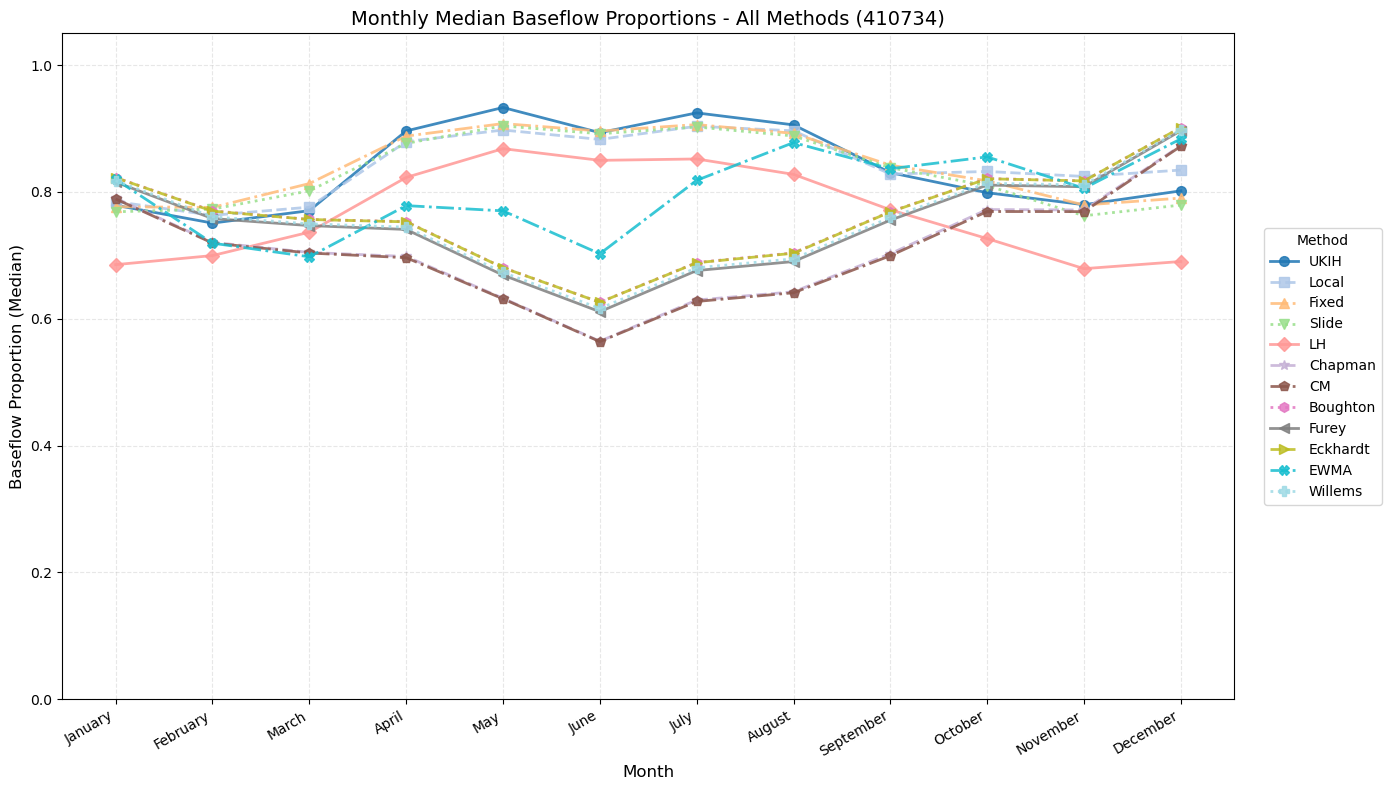


--- Summary: Median Annual Baseflow Proportion (410734) ---
  Local       : 0.849
  Fixed       : 0.848
  UKIH        : 0.846
  Slide       : 0.840
  EWMA        : 0.796
  LH          : 0.772
  Boughton    : 0.741
  Eckhardt    : 0.740
  Willems     : 0.733
  Furey       : 0.729
  Chapman     : 0.685
  CM          : 0.683



/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/4245979009.py:79: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



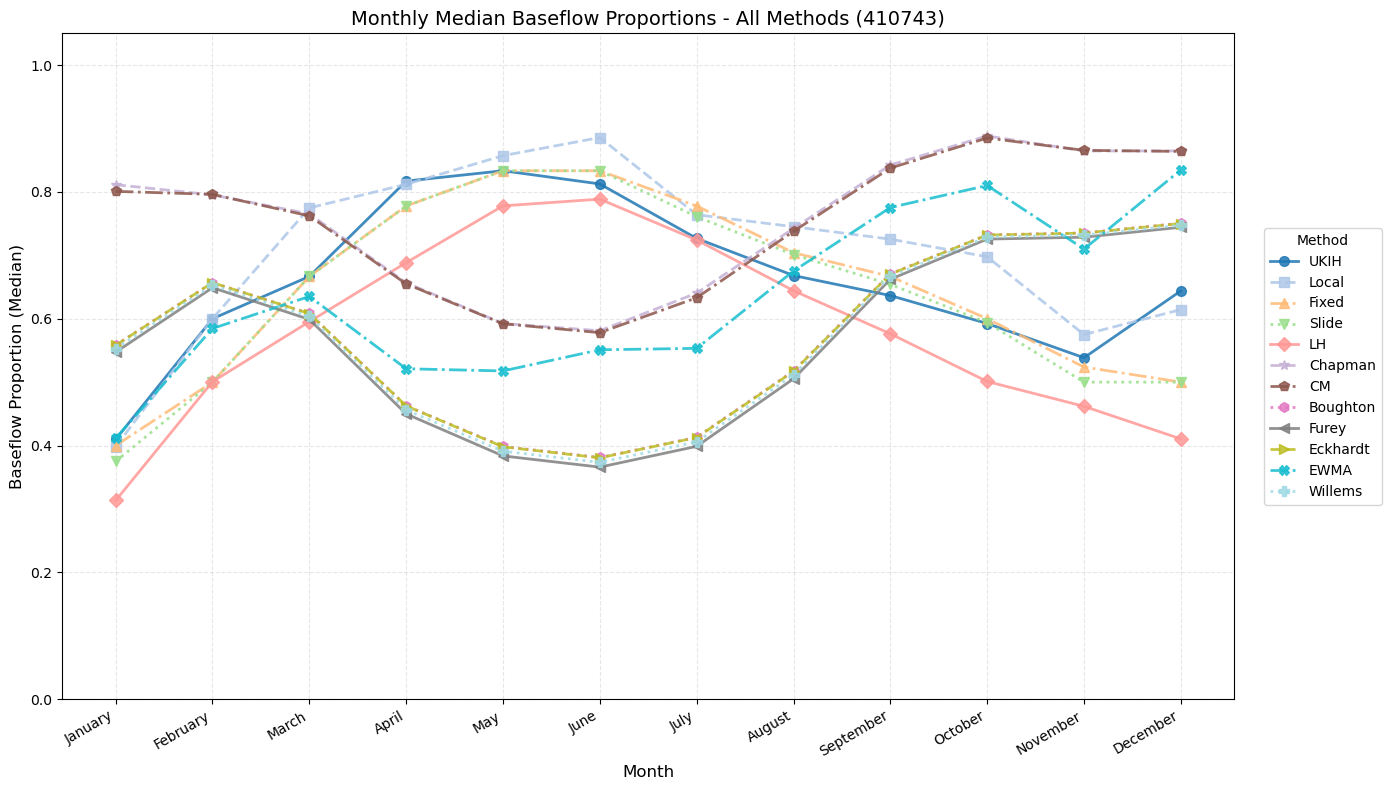


--- Summary: Median Annual Baseflow Proportion (410743) ---
  Chapman     : 0.730
  CM          : 0.726
  Local       : 0.726
  UKIH        : 0.678
  Fixed       : 0.667
  Slide       : 0.667
  EWMA        : 0.621
  LH          : 0.587
  Boughton    : 0.529
  Eckhardt    : 0.529
  Willems     : 0.524
  Furey       : 0.518



/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/4245979009.py:79: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



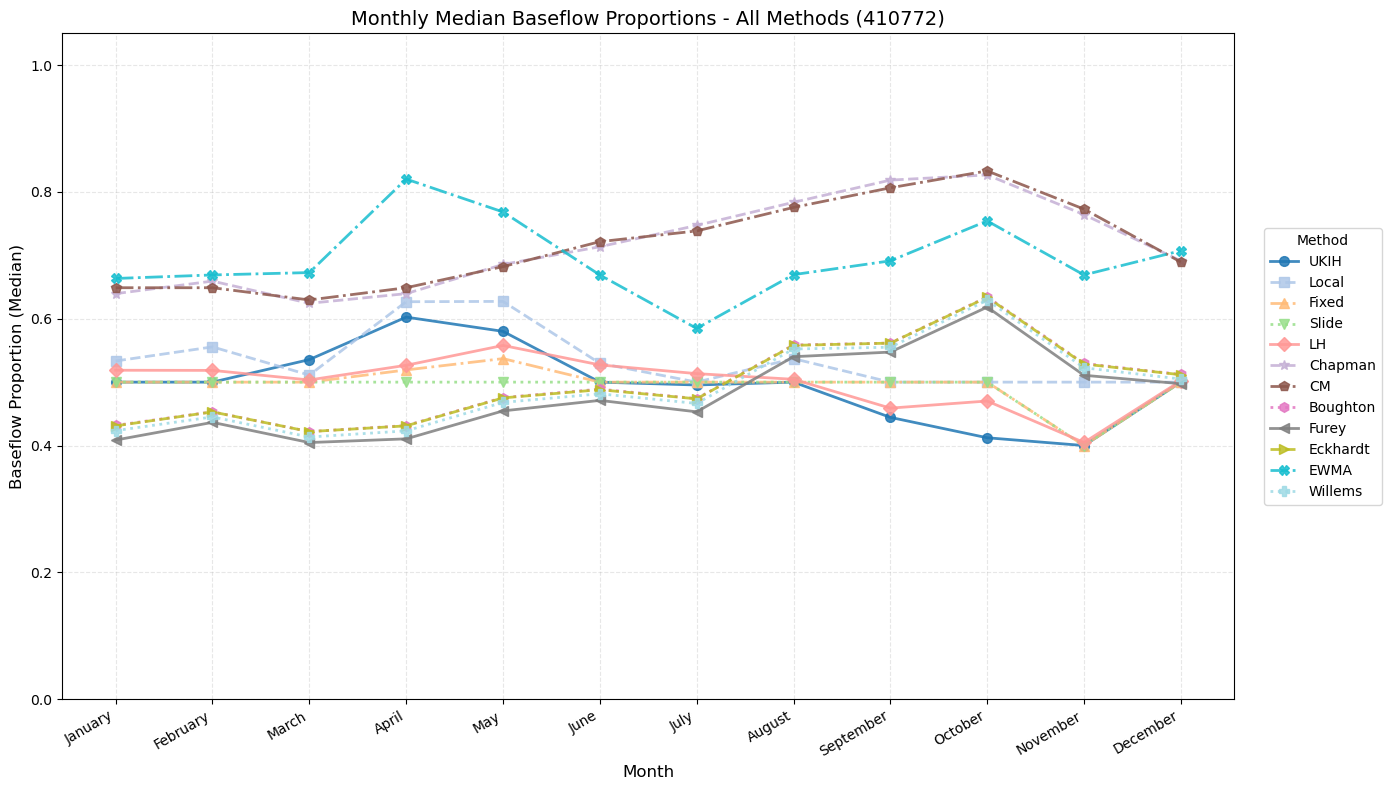


--- Summary: Median Annual Baseflow Proportion (410772) ---
  CM          : 0.723
  Chapman     : 0.714
  EWMA        : 0.676
  LH          : 0.510
  Local       : 0.507
  UKIH        : 0.500
  Fixed       : 0.500
  Slide       : 0.500
  Boughton    : 0.497
  Eckhardt    : 0.497
  Willems     : 0.490
  Furey       : 0.479



/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/4245979009.py:79: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



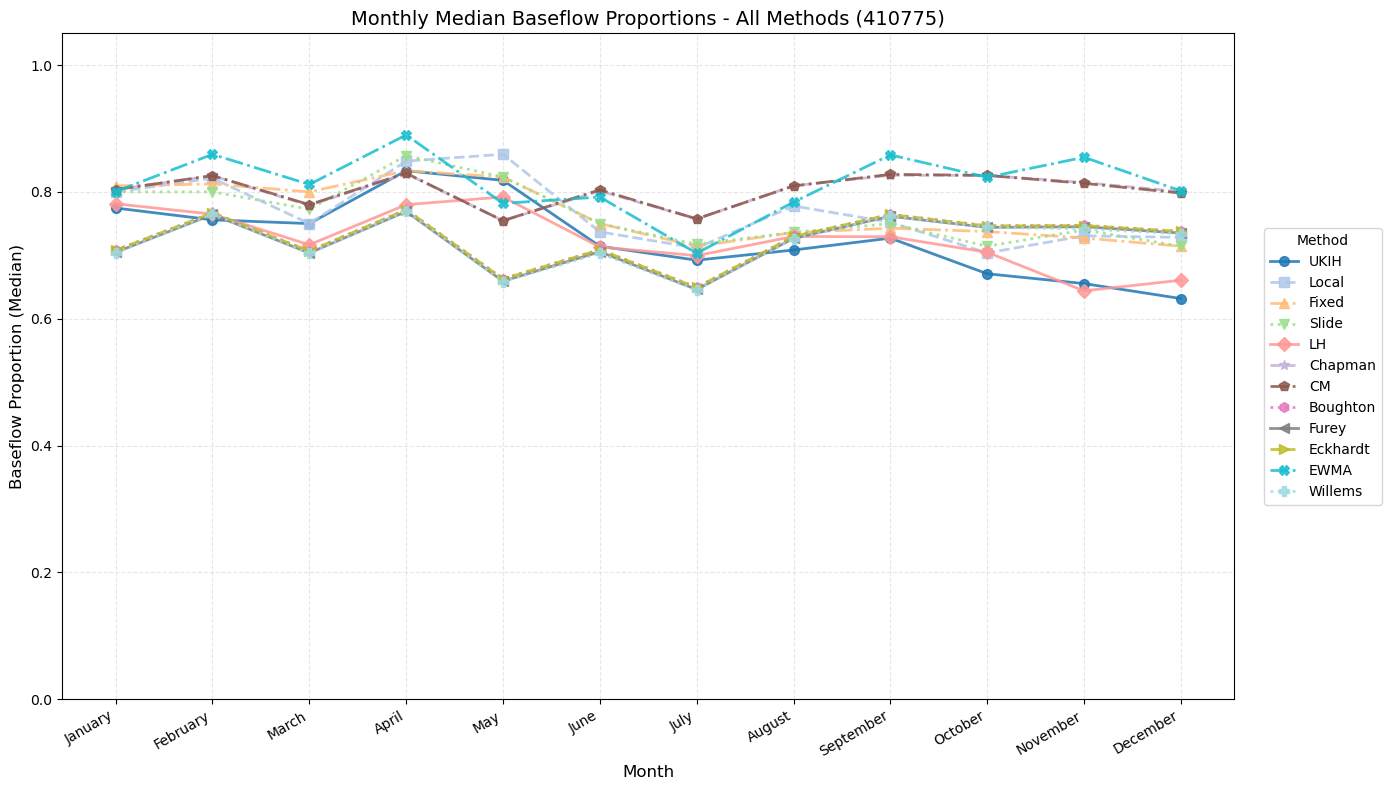


--- Summary: Median Annual Baseflow Proportion (410775) ---
  EWMA        : 0.820
  Chapman     : 0.804
  CM          : 0.804
  Local       : 0.773
  Fixed       : 0.773
  Slide       : 0.771
  UKIH        : 0.733
  LH          : 0.730
  Boughton    : 0.728
  Eckhardt    : 0.728
  Furey       : 0.725
  Willems     : 0.725



/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/4245979009.py:79: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



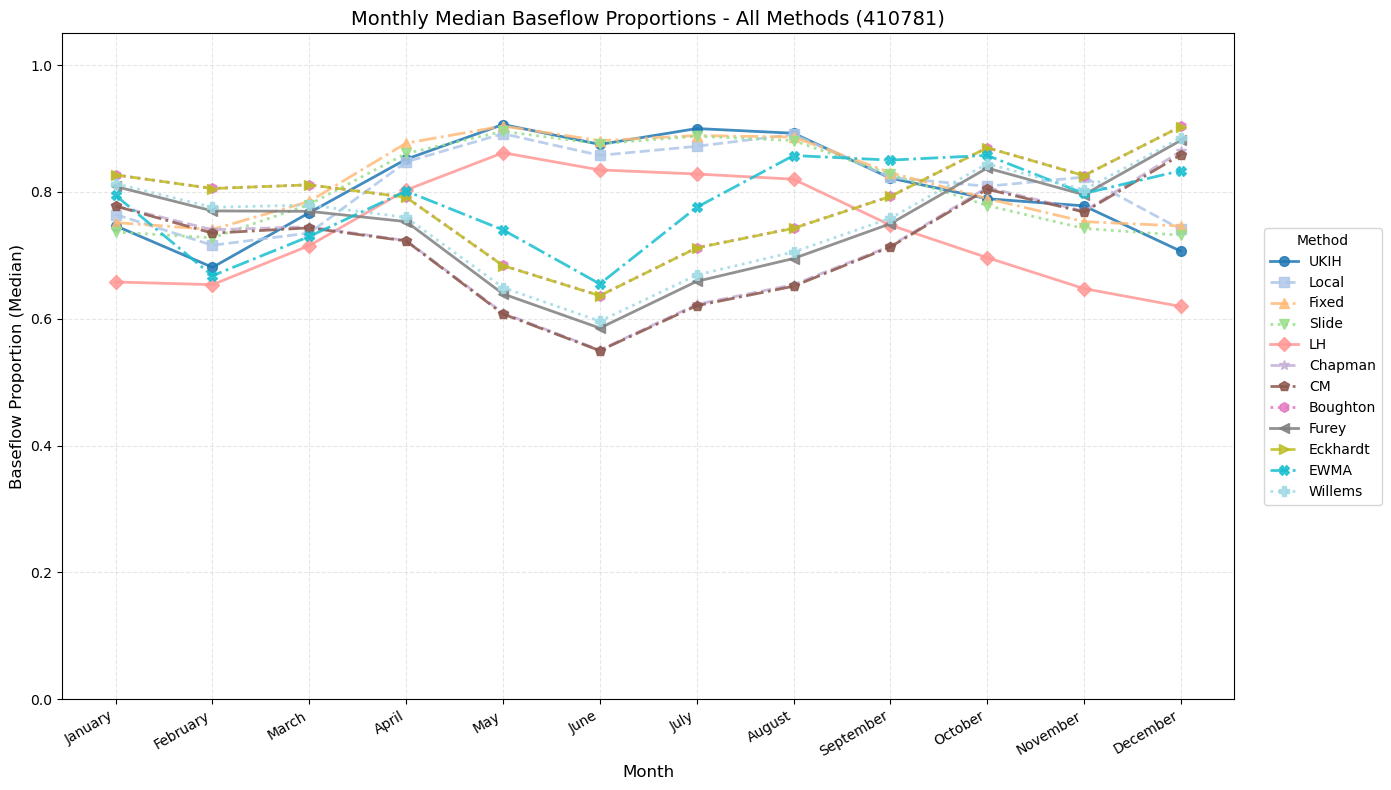


--- Summary: Median Annual Baseflow Proportion (410781) ---
  Fixed       : 0.834
  Local       : 0.828
  Slide       : 0.824
  UKIH        : 0.823
  EWMA        : 0.779
  Boughton    : 0.763
  Eckhardt    : 0.763
  LH          : 0.746
  Willems     : 0.726
  Furey       : 0.718
  Chapman     : 0.684
  CM          : 0.682



/var/folders/88/nsxfmy89127_4zqn71spykbm0000gn/T/ipykernel_39787/4245979009.py:79: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



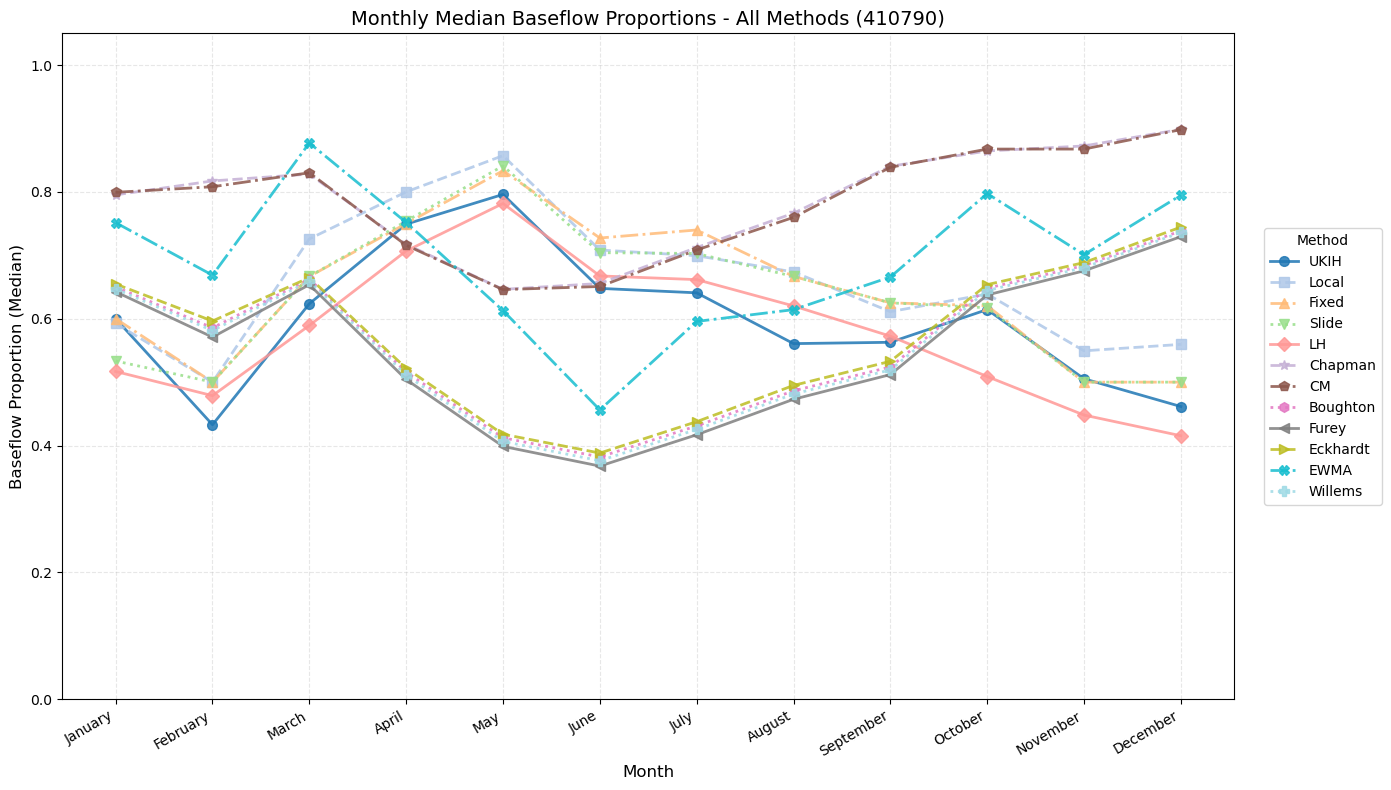


--- Summary: Median Annual Baseflow Proportion (410790) ---
  Chapman     : 0.769
  CM          : 0.768
  EWMA        : 0.669
  Local       : 0.667
  Fixed       : 0.667
  Slide       : 0.643
  UKIH        : 0.607
  LH          : 0.585
  Eckhardt    : 0.534
  Boughton    : 0.526
  Willems     : 0.522
  Furey       : 0.515



In [53]:
# Plot monthly proportions for all baseflow separation methods
for csv_path in sorted(csv_files):
    plot_monthly_proportions_all_methods(
        [csv_path],
        date_col='Date',
        figsize=(14, 8)
    )